In [1]:

import pandas as pd

df_data = pd.read_csv("DonaldTrump.csv")
df_data.head()
print(df_data.columns)

Index(['tweet_id', 'created date', 'tweet', 'tw_type', 'RT Count', 'Fav',
       'emotion_sad', 'emotion_joy', 'emotion_fear', 'emotion_disgust',
       'emotion_anger', 'concept1', 'concept1_relevance', 'concept2',
       'concept2_relevance', 'category_label', 'category_score'],
      dtype='object')


In [2]:
# removing unwanted columns

df_data = df_data.drop(['tweet_id','category_label', 'category_score'], axis=1)
print(df_data.columns)

Index(['created date', 'tweet', 'tw_type', 'RT Count', 'Fav', 'emotion_sad',
       'emotion_joy', 'emotion_fear', 'emotion_disgust', 'emotion_anger',
       'concept1', 'concept1_relevance', 'concept2', 'concept2_relevance'],
      dtype='object')


In [3]:
# splitting date and time

df_data['Date'] = pd.to_datetime(df_data['created date']).dt.date
df_data['Time'] = pd.to_datetime(df_data['created date']).dt.time

print(df_data.columns)

Index(['created date', 'tweet', 'tw_type', 'RT Count', 'Fav', 'emotion_sad',
       'emotion_joy', 'emotion_fear', 'emotion_disgust', 'emotion_anger',
       'concept1', 'concept1_relevance', 'concept2', 'concept2_relevance',
       'Date', 'Time'],
      dtype='object')


## Data Exploration

In [11]:
#Exploratory Analysis
#percent of missing values for each column


pd.DataFrame(df_data.isnull().sum()/df_data.shape[0]*100,columns=['Percentage of Missing Values, Each Column']).round(2)


,"Percentage of Missing Values, Each Column"
created date,0.0
tweet,1.9
tw_type,0.0
RT Count,0.0
Fav,0.0
emotion_sad,0.0
emotion_joy,0.0
emotion_fear,0.0
emotion_disgust,0.0
emotion_anger,0.0


In [32]:
print("The shape of data is:")
print(df_data.shape)
print("Number of dimensions:")
print(df_data.ndim)
print('Data types of each column:')
print(df_data.dtypes)

The shape of data is:
(912, 16)
Number of dimensions:
2
Data types of each column:
created date           object
tweet                  object
tw_type                object
RT Count                int64
Fav                     int64
emotion_sad           float64
emotion_joy           float64
emotion_fear          float64
emotion_disgust       float64
emotion_anger         float64
concept1               object
concept1_relevance    float64
concept2               object
concept2_relevance    float64
Date                   object
Time                   object
dtype: object


In [4]:
# g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_data, hue="RT Count")


In [ ]:
#df_data.groupby('emotion_disgust')['emotion_anger'].plot(legend=True)

# Scatter Plot Favourites Vs. Sad Emotion

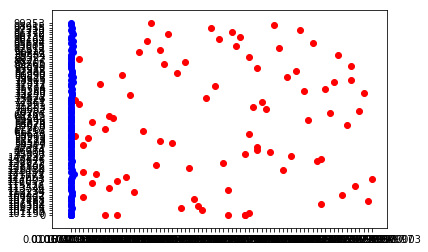

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline

#from plt import scatter
df_1 = df_data[['Fav']]
df_2 = df_data[['emotion_sad']]
df_3 = df_data[['emotion_joy']]


plt.scatter(df_2.head(90), df_1.head(90), color = 'red') #see how much supports a sad tweet gets
plt.scatter(df_3.head(90), df_1.head(90), color = 'blue')
plt.show() #render graph


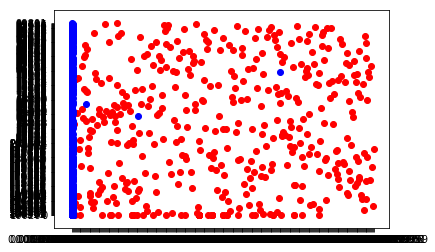

In [12]:
import matplotlib.pyplot as plt
#from plt import scatter
df_1 = df_data[['Fav']]
df_2 = df_data[['emotion_sad']]
df_3 = df_data[['emotion_joy']]


plt.scatter(df_2.head(450), df_1.head(450), color = 'red') #see how much supports a sad tweet gets
plt.scatter(df_3.head(450), df_1.head(450), color = 'blue')
plt.show()


### Correlations

In [170]:
import numpy as np
print("Correlation b/w No. of Likes and Sad Tweet")
corr1 = np.corrcoef(df_data['Fav'],df_data['emotion_sad']) #Sad
print(corr1)

print("Correlation b/w No. of Likes and Happy Tweet")
corr2 = np.corrcoef(df_data['Fav'],df_data['emotion_joy']) #Joy
print(corr2)

print("Correlation b/w No. of Likes and Angry Tweet")
corr3 = np.corrcoef(df_data['Fav'],df_data['emotion_anger']) #Angry
print(corr3)

print("Correlation b/w No. of Likes and Fearful Tweet")
corr4 = np.corrcoef(df_data['Fav'],df_data['emotion_fear']) #Frightened
print(corr4)

print("Correlation b/w No. of Likes and RT Count")
corr5 = np.corrcoef(df_data['Fav'],df_data['RT Count']) #Tweet Type
print(corr5)



Correlation b/w No. of Likes and Sad Tweet
[[ 1.          0.18692443]
 [ 0.18692443  1.        ]]
Correlation b/w No. of Likes and Happy Tweet
[[ 1.         -0.08772037]
 [-0.08772037  1.        ]]
Correlation b/w No. of Likes and Angry Tweet
[[ 1.          0.14233014]
 [ 0.14233014  1.        ]]
Correlation b/w No. of Likes and Fearful Tweet
[[ 1.          0.16715991]
 [ 0.16715991  1.        ]]
Correlation b/w No. of Likes and RT Count
[[ 1.          0.75955585]
 [ 0.75955585  1.        ]]


In [177]:
import pandas as pd
import numpy as np


corr = df_data.corr()
corr.style.background_gradient()

,RT Count,Fav,emotion_sad,emotion_joy,emotion_fear,emotion_disgust,emotion_anger,concept1_relevance,concept2_relevance
RT Count,1,0.759556,0.17729,-0.205773,0.100048,0.197924,0.19591,0.0266989,0.0565584
Fav,0.759556,1,0.186924,-0.0877204,0.16716,0.0955261,0.14233,-0.00324274,0.0800181
emotion_sad,0.17729,0.186924,1,-0.600398,0.328283,0.230161,0.307123,0.0380556,-0.0177384
emotion_joy,-0.205773,-0.0877204,-0.600398,1,-0.425263,-0.512949,-0.56513,-0.0880212,0.0242986
emotion_fear,0.100048,0.16716,0.328283,-0.425263,1,0.127127,0.209112,0.0083389,-0.0113371
emotion_disgust,0.197924,0.0955261,0.230161,-0.512949,0.127127,1,0.404135,0.0393959,-0.0434181
emotion_anger,0.19591,0.14233,0.307123,-0.56513,0.209112,0.404135,1,0.0399937,0.0539631
concept1_relevance,0.0266989,-0.00324274,0.0380556,-0.0880212,0.0083389,0.0393959,0.0399937,1,-0.109136
concept2_relevance,0.0565584,0.0800181,-0.0177384,0.0242986,-0.0113371,-0.0434181,0.0539631,-0.109136,1


## Histograms


Text(0.5,1,'Tweet Analytics')

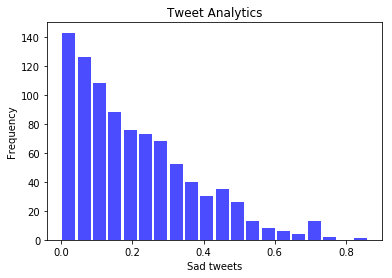

In [137]:
import numpy as np

x1 = df_data['emotion_sad']
n, bins, patches = plt.hist(x=x1, bins=20, color = 'b',
                            alpha=0.7, rwidth=0.85)

#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Sad tweets')
plt.ylabel('Frequency')
plt.title('Tweet Analytics')
#plt.text(23, 45, r'$\mu=15, b=3$')
#maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Text(0.5,1,'Tweet Analytics')

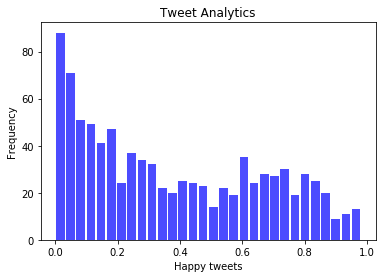

In [140]:
x1 = df_data['emotion_joy']
n, bins, patches = plt.hist(x1, bins=20, color = 'b',
                            alpha=0.7, rwidth=0.85)

#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Happy tweets')
plt.ylabel('Frequency')
plt.title('Tweet Analytics')

Text(0.5,1,'Tweet Analytics')

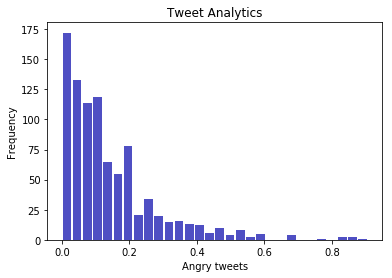

In [141]:
n, bins, patches = plt.hist(x=df_data['emotion_anger'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angry tweets')
plt.ylabel('Frequency')
plt.title('Tweet Analytics')

Text(0.5,1,'Tweet Analytics')

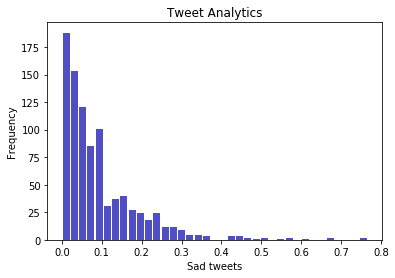

In [142]:
n, bins, patches = plt.hist(x=df_data['emotion_fear'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fearful tweets')
plt.ylabel('Frequency')
plt.title('Tweet Analytics')

## Emotions Vs. No. of Likes

Text(0.5,1,'Tweet Analytics')

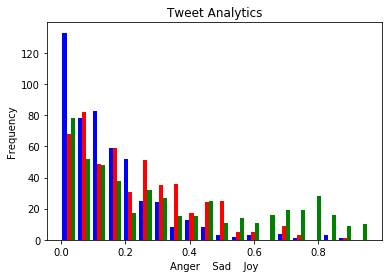

In [157]:
#x0 = df_data['Fav']

from matplotlib.patches import Rectangle

x1= df_data['emotion_anger'].head(500)
x2= df_data['emotion_sad'].head(500)
x3= df_data['emotion_joy'].head(500)
labels = ["Anger","Sad", "Joy"]
n, bins, patches = plt.hist(x=[x1,x2,x3], bins=20, color=['b','r', 'g'], label  = labels)

#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Anger    Sad    Joy')
plt.ylabel('Frequency')
plt.title('Tweet Analytics')

In [123]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
df = df_data
target = 'RT Count'
def histly(df,target):
    title_text='Histogram of log of average {0}'.format(target)
    
    data = [go.Histogram(x=np.log1p(df[target]))]
    
    shapes_list=[{
        'type': 'line',
        'xref': 'x',
        'yref': 'paper',
        'x0': np.log1p(df[target].mean()),
        'y0':0,
        'x1': np.log1p(df[target].mean()),
        'y1':1,
        'line': {
            'color': 'b',
            'width': 3,
            'dash': 'dashdot'
        }}]
        
    annotations_list=[{
            'x':np.log1p(df[target].mean()),
            'y': 50,
            'xref':'x',
            'yref':'y',
            'text':'Average across all data',
            'showarrow':True,
            'arrowhead':7,
            'ax':100,
            'ay':-100
            }]
        
    layout = go.Layout(
        title=title_text,
        font=dict(size=14, color='b'),
        xaxis={
        'title':'Log of average',
        'titlefont':{
            'size':15,
            'color':'b'
        }
        },
        yaxis={
        'title':'Count',
        'titlefont':{
            'size':15,
            'color':'b'
        }
        },
        autosize=True,
        shapes=shapes_list,
        annotations=annotations_list
        )
    
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
histly(df,target)

In [110]:
#most liked Tweet
print("The tweet below is the most Liked:")
print(df_data.loc[df_data['Fav'].idxmax(), 'tweet'])

print("with number of likes:")
print(df_data.loc[df_data['Fav'].idxmax(), 'Fav'])

The tweet below is the most Liked:
Had a very good conversation with the newly elected President of Brazil, Jair Bolsonaro, who won his race by a subs… 
with number of likes:
339730


In [91]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
#Detail of the Tweet that got highest number of Favourites
print(color.BOLD + color.CYAN + color.UNDERLINE+ "Detail of the Tweet that got highest number of Favourites")
#print(df_data.loc[df_data['Fav'].idxmax()])

print(color.END)
print(df_data.loc[df_data['Fav'].idxmax()])

Detail of the Tweet that got highest number of Favourites

created date                                           29/10/2018 12:28
tweet                 Had a very good conversation with the newly el...
tw_type                                                            Link
RT Count                                                          91915
Fav                                                              339730
emotion_sad                                                    0.047505
emotion_joy                                                    0.738717
emotion_fear                                                   0.019466
emotion_disgust                                                0.137844
emotion_anger                                                   0.06995
concept1                                             Politics of Brazil
concept1_relevance                                             0.878864
concept2                                     Gangs in the United States
conce

## Data Preparation

In [96]:
train=df_data.loc[:,['tweet','Fav']]

#sampling 5% of the daset for the representation purposes of the next two steps.
train=train.sample(frac=0.05,axis=0).reset_index()

train=train.dropna()
train.shape

import string
train['tweet_nopuncs']=train['tweet'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))

#lower casing titles
train['tweet_nopuncs']=train['tweet_nopuncs'].apply(lambda x: x.lower())

# tokenizing the headlines
train['tokenz'] = train['tweet_nopuncs'].apply(lambda x: x.split())
train['tokenz'].head(20)

0     [congratulations, to, newly, inaugurated, mexi...
1     [i, can’t, imagine, any, president, having, a,...
2     [i, would, like, to, begin, today’s, remarks, ...
3     [i, am, pleased, to, announce, that, heather, ...
4     [i, am, pleased, to, announce, my, nomination,...
5                      [realdonaldtrump, so, revealing]
6     [twitter, has, removed, many, people, from, my...
7     [i, am, glad, that, my, friend, emmanuelmacron...
8     [so, nice, everyone, wants, ivanka, trump, to,...
9     [on, behalf, of, flotus, melania, and, the, en...
10            [dbongino, what, the, hell, is, this, 👇🏻]
11    [flguard, hurricanemichael, is, here, but, so,...
12    [realdonaldtrump, martha, mcsally, is, a, grea...
13    [congressman, petesessions, of, texas, is, a, ...
14    [even, president, ronald, reagan, tried, for, ...
15    [billions, of, dollars, are, and, will, be, co...
16    [florida, highway, patrol, troopers, are, all,...
17                     [realdonaldtrump, so, rev

In [102]:
import itertools

#this will create a list of all words
words=list(itertools.chain.from_iterable(train['tokenz']))

#this will create a list of unique words
unique_words=list(set(words))

print('Number of unique words:',len(set(unique_words)))
#display(unique_words)

Number of unique words: 420
